In [77]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [84]:
batch_size = 512
size_hidden = 20
reg_coef = 100

dir_name = f"/home/flaessig/Continual-Learning-Benchmark/outputs/lr-sweep-{batch_size=}-{size_hidden=}-{reg_coef=}/"
lrs = [1 / 10**(i / 2) for i in range(3, 4, 1)]

results = {'bp': {}, 'ewc': {}}

for name in results.keys():
    results[name]['means'] = []
    results[name]['stds'] = []
    for lr in lrs:
        file_name = dir_name + f"{name}/{lr=}.log"
        with open(file_name) as f:
            f = f.readlines()
        summary = f[-1]
        results[name]['means'].append(float(re.search('mean: (.*) std', summary).group(1)))
        results[name]['stds'].append(float(re.search('std: (.*)', summary).group(1)))

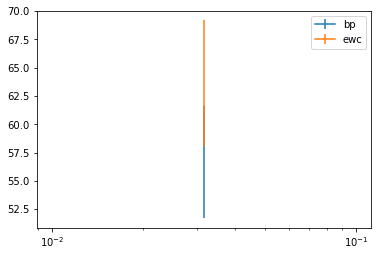

In [85]:
for name, val in results.items():
    plt.errorbar(lrs, val['means'], yerr=val['stds'], label=name)
plt.legend()
plt.xscale('log')